# Walmart project

# Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply
1.	You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
a.	If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
b.	If the weekly sales show a seasonal trend, when and what could be the reason?
c.	Does temperature affect the weekly sales in any manner?
d.	How is the Consumer Price index affecting the weekly sales of various stores?
e.	Top performing stores according to the historical data.
f.	The worst performing store, and how significant is the difference between the highest and lowest performing stores.






2.	Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.


# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data 

In [2]:
df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.shape

(6435, 8)

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Data Preprocessing and  EDA

In [5]:
#check the missing value 
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
#convert date into datetime formate
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [9]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
df['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [11]:
#std information 
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
col_name = df.columns

In [13]:
col_name

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

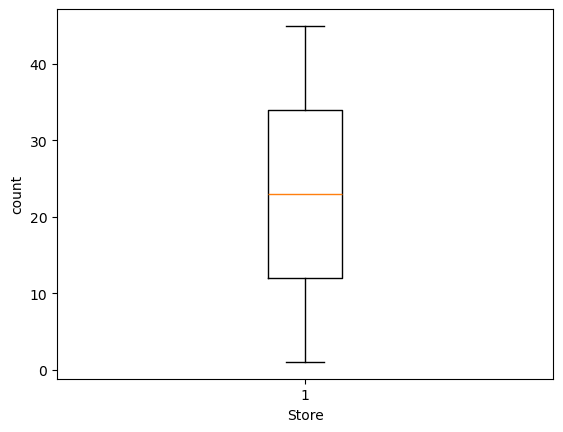

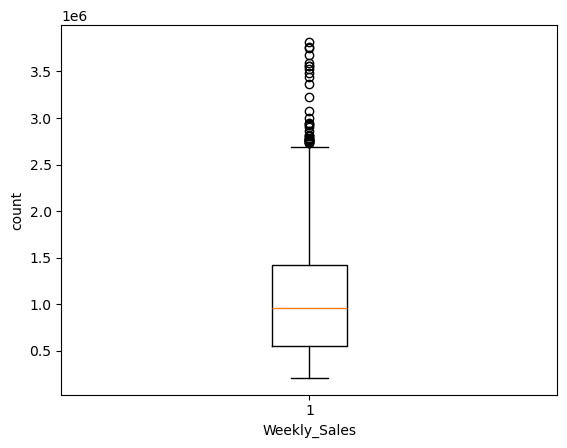

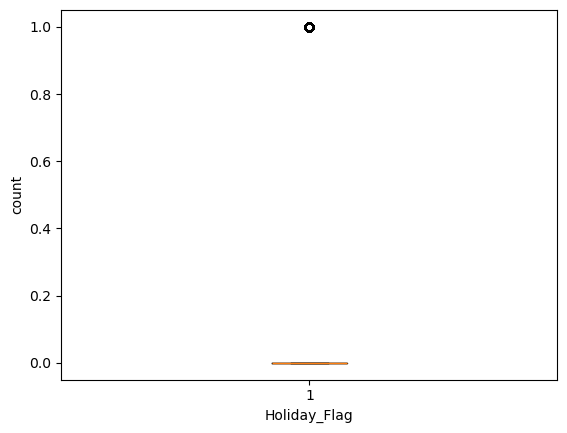

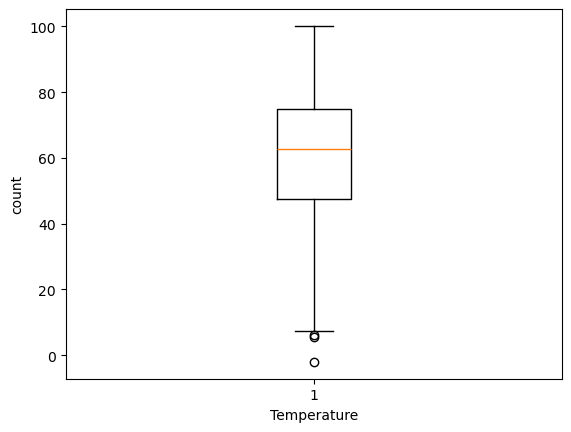

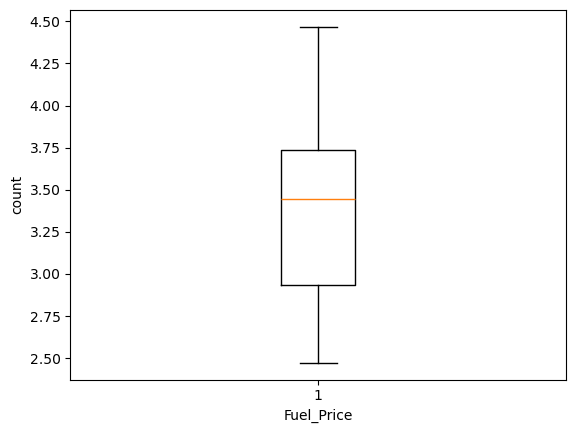

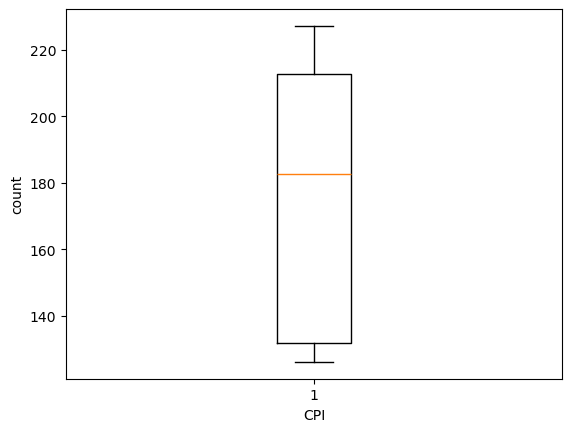

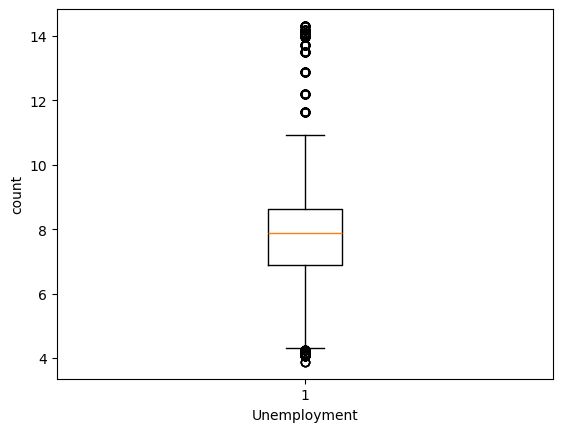

In [14]:
for col in col_name:
    if df[col].dtype!='object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [15]:
outlier_columns = ['Weekly_Sales','Temperature','Unemployment']

In [16]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    df = df[(df[col]>=lower_range) & (df[col]<= upper_range)]
    

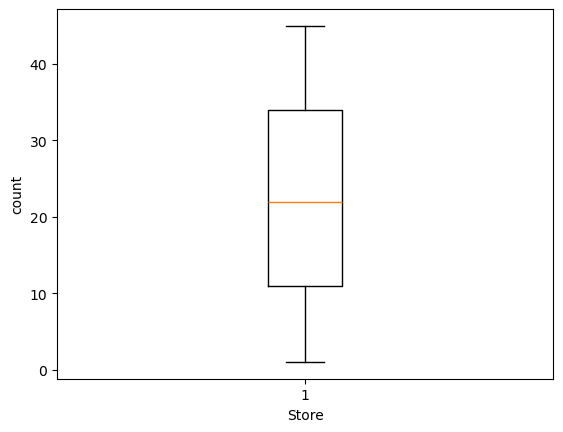

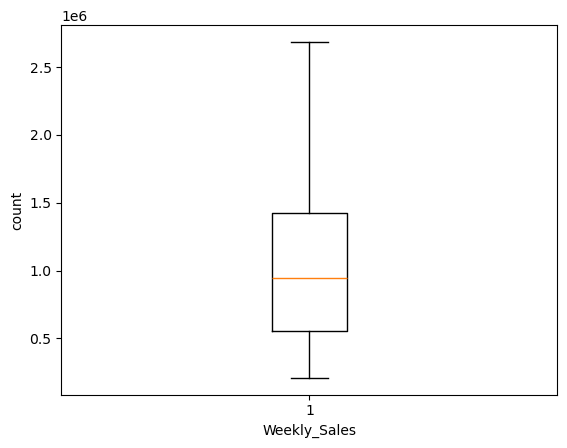

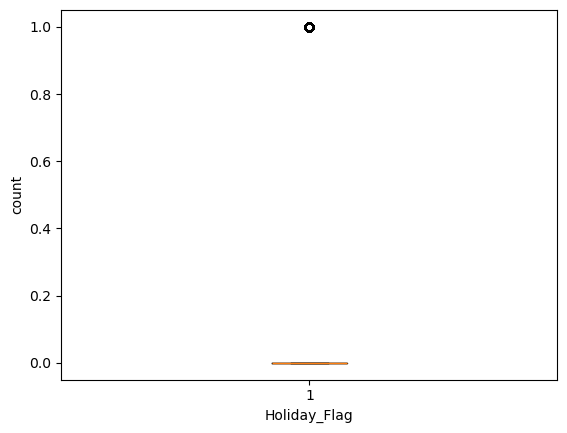

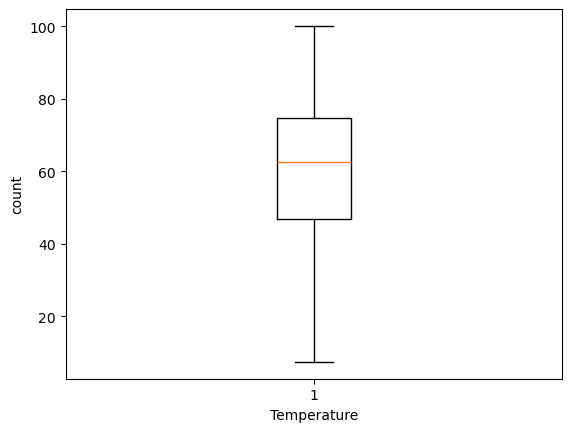

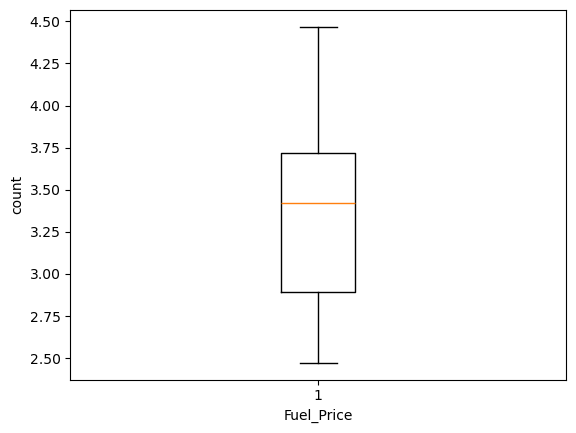

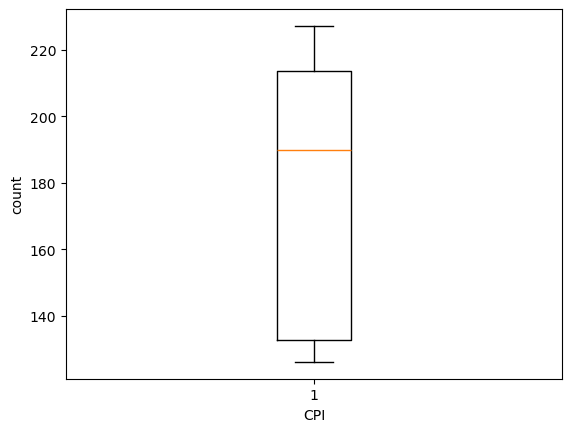

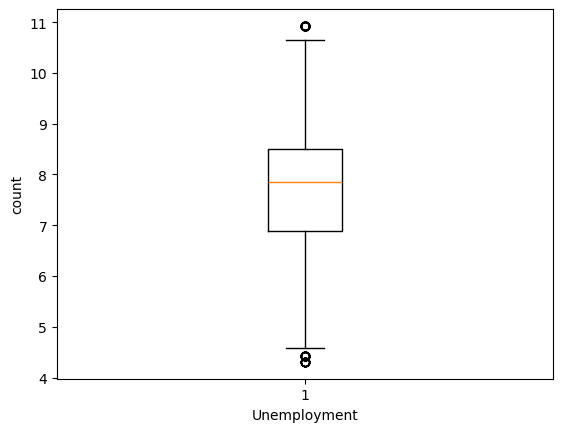

In [17]:
for col in col_name:
    if df[col].dtypes!='object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [18]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [19]:
df=df.sort_values('Date')


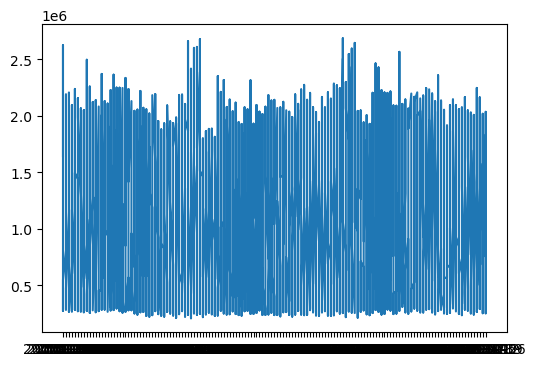

In [20]:
#visualisation the seasonal tread in weekly sales
plt.figure(figsize=(6, 4))
plt.plot(df['Date'],df['Weekly_Sales'])

### a.	If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [21]:
numeric_columns = df.select_dtypes(include = 'number')
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


In [22]:
from scipy import stats


In [23]:
corr, _ = stats.spearmanr( df["Unemployment"],df["Weekly_Sales"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.028


<Axes: xlabel='Store', ylabel='count'>

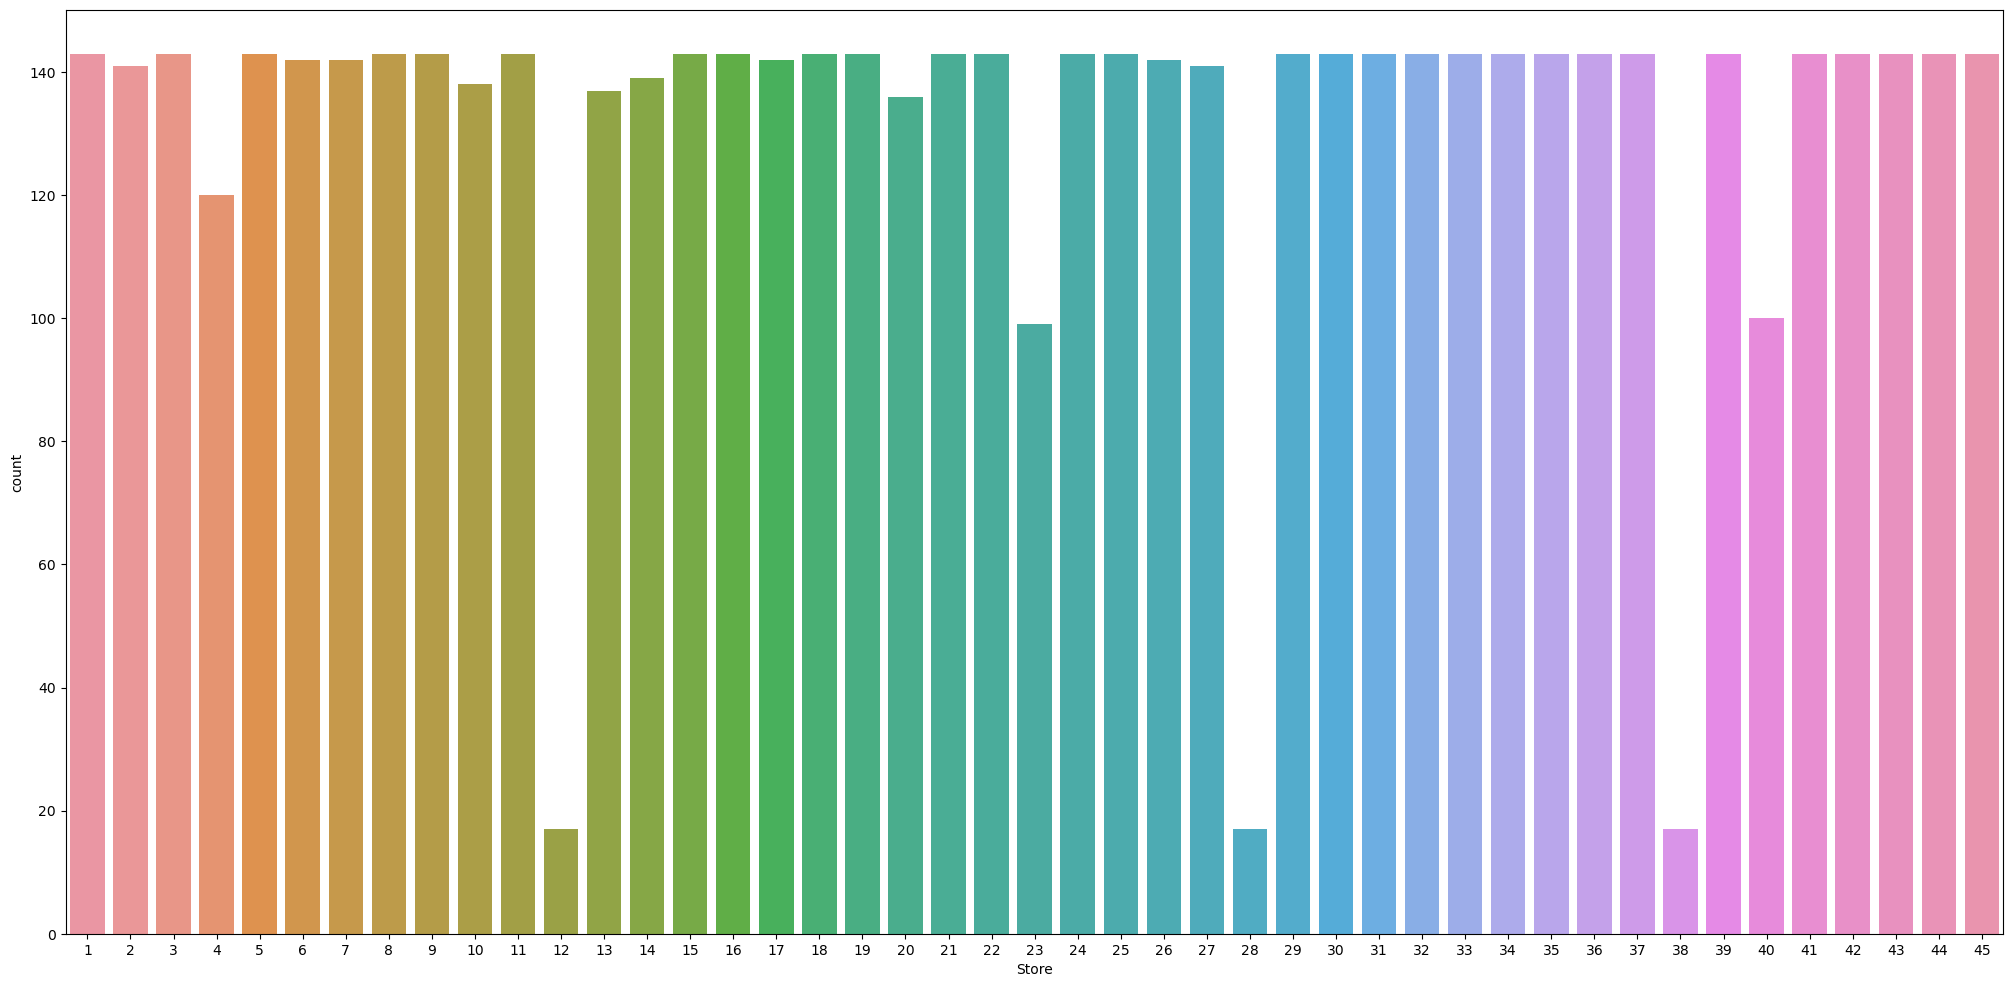

In [24]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Store', data = df)

In [25]:
df['Store'].value_counts()

Store
1     143
18    143
5     143
24    143
11    143
45    143
15    143
16    143
19    143
34    143
21    143
22    143
41    143
42    143
25    143
9     143
44    143
8     143
3     143
43    143
31    143
32    143
33    143
39    143
29    143
35    143
36    143
37    143
30    143
7     142
17    142
26    142
6     142
27    141
2     141
14    139
10    138
13    137
20    136
4     120
40    100
23     99
12     17
38     17
28     17
Name: count, dtype: int64

In [26]:
group_by_store = df.groupby('Store').agg({'Weekly_Sales':['sum','count']})
group_by_max_week_store = group_by_store[group_by_store['Weekly_Sales']['count'] == group_by_store['Weekly_Sales']['count'].max()]
group_by_max_week_store['Weekly_Sales']['sum'].sort_values(ascending=True)

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
8     1.299512e+08
35    1.315207e+08
34    1.382498e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
11    1.939628e+08
24    1.940160e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
Name: sum, dtype: float64

In [27]:
new_data = df[['Date','Weekly_Sales']]

In [28]:
new_data

,Date,Weekly_Sales
0,2010-02-05,1643690.90
3718,2010-02-05,1874289.79
429,2010-02-05,2135143.87
4004,2010-02-05,538634.46
4147,2010-02-05,465108.52
...,...,...
2573,2012-10-26,1127516.25
2716,2012-10-26,1322117.96
5862,2012-10-26,1316542.59
1858,2012-10-26,2035189.66


In [30]:
# from the above plot  x-axis considerd as Date and y as Weekly sales  seems does not have any seasonality trend.

The above chart does not show seasonality because line same line does not get repeated subsequently as weekly date seems repeated for all the stores.

### c. Does temperature affect the weekly sales in any manner?

In [31]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
3718,27,2010-02-05,1874289.79,0,27.19,2.954,135.352461,8.237
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...,...
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243
2716,19,2012-10-26,1322117.96,0,56.49,4.071,138.728161,7.992
5862,41,2012-10-26,1316542.59,0,41.80,3.686,199.219532,6.195
1858,13,2012-10-26,2035189.66,0,46.97,3.755,131.193097,5.621


In [32]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrixs = numeric_columns.corr()
correlation_matrixs

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


In [33]:
corr,_ = stats.spearmanr(df['Temperature'],df['Weekly_Sales'])
print('Spearmans correlation: %.3f'%corr)

Spearmans correlation: -0.063


### No
### 1  Corelation of both the columns  is -0.04. and spearman correlation is -0.063  as oberved both the variables are not dependant on each other.
### 2. Since Weekly Sales and Temperature does not get affected with each other.

### d. How is the Consumer Price index affecting the weekly sales of various stores?

In [34]:
numerics_columns = df.select_dtypes(include='number')
correlation_matrix = numerics_columns.corr()
correlation_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


In [35]:
store_1_df = df[df['Store']==1]


In [36]:
numeric_columns = store_1_df.select_dtypes(include='number')
correlatio_matrix = numeric_columns.corr()
correlatio_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955
Holiday_Flag,NaN,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949
Temperature,NaN,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,NaN,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944
CPI,NaN,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471
Unemployment,NaN,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000


In [37]:
corr,_ = stats.spearmanr(store_1_df['Temperature'],store_1_df['Weekly_Sales'])
print('spearmans correlation: %.3f' % corr)                      

spearmans correlation: -0.177


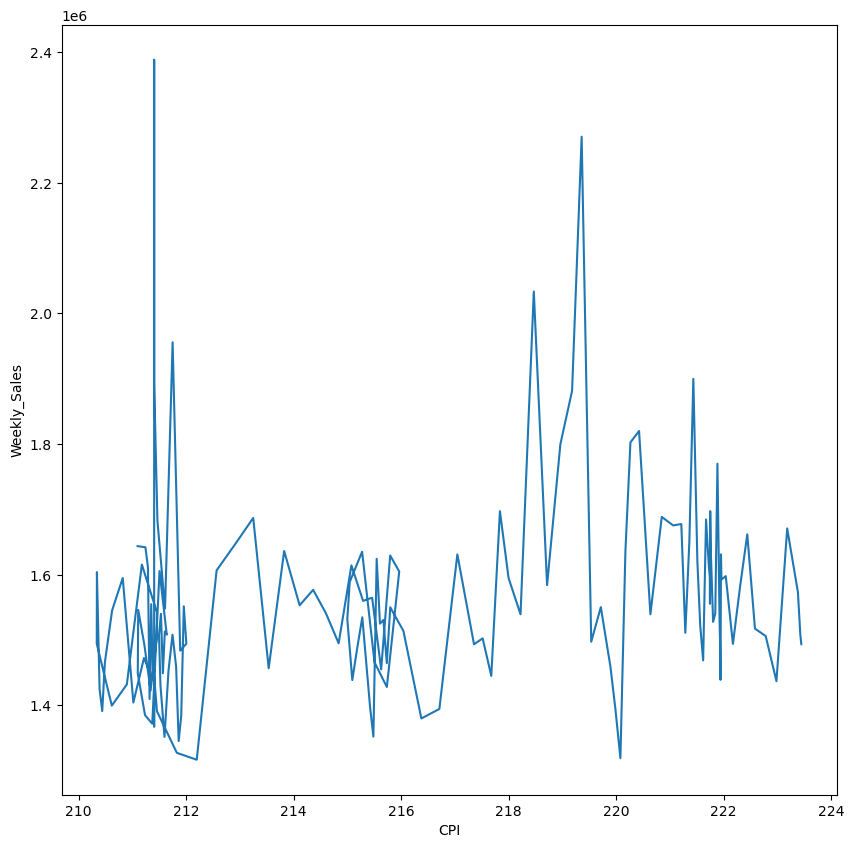

In [38]:
plt.figure(figsize=(10,10))
plt.plot(store_1_df['CPI'],store_1_df['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

### No
### 1  Corelation of both the columns  is -0.08. and spearman correlation is -0.177 as oberved both the variables are not dependant on each other.
### 2. Since Weekly Sales and CPI does not get affected with each other.  

### e. Top performing stores according to the historical data.

In [39]:
group_by_store_top = df.groupby('Store').agg({'Weekly_Sales':['sum']})
group_by_store_top['Weekly_Sales']['sum'].sort_values(ascending=False)

Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
27    2.480387e+08
4     2.446487e+08
1     2.224028e+08
6     2.210286e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
24    1.940160e+08
11    1.939628e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
26    1.425989e+08
34    1.382498e+08
23    1.372484e+08
35    1.315207e+08
8     1.299512e+08
17    1.266991e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
40    9.669790e+07
43    9.056544e+07
15    8.913368e+07
7     8.104025e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
28    2.110677e+07
12    1.638671e+07
38    7.347379e+06
Name: sum, dtype: float64

### Below are the top 3 performing stores store no 20,14,2
### 20 280023734.81
### 14 276127584.78
### 2 268722063.50

### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores


In [40]:
group_by_store_worst = df.groupby('Store').agg({'Weekly_Sales':['sum']})
group_by_store_worst['Weekly_Sales']['sum'].sort_values(ascending=True)

Store
38    7.347379e+06
12    1.638671e+07
28    2.110677e+07
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.104025e+07
15    8.913368e+07
43    9.056544e+07
40    9.669790e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.266991e+08
8     1.299512e+08
35    1.315207e+08
23    1.372484e+08
34    1.382498e+08
26    1.425989e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
11    1.939628e+08
24    1.940160e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
6     2.210286e+08
1     2.224028e+08
4     2.446487e+08
27    2.480387e+08
10    2.556789e+08
13    2.682025e+08
2     2.687221e+08
14    2.761276e+08
20    2.800237e+08
Name: sum, dtype: float64

### Below are the top 3 worst performing stores store no 38,12,28
### 38 7347378.89
###  12 16386710.79
### 28 21106767.80

In [41]:
print("difference of highest and lowest performing store is ",group_by_store_worst.max()[0] - group_by_store_worst.min()[0])

difference of highest and lowest performing store is  272676355.92


C:\Users\kg317\AppData\Local\Temp\ipykernel_8428\3488892597.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("difference of highest and lowest performing store is ",group_by_store_worst.max()[0] - group_by_store_worst.min()[0])


### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [42]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
3718,27,2010-02-05,1874289.79,0,27.19,2.954,135.352461,8.237
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...,...
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243
2716,19,2012-10-26,1322117.96,0,56.49,4.071,138.728161,7.992
5862,41,2012-10-26,1316542.59,0,41.80,3.686,199.219532,6.195
1858,13,2012-10-26,2035189.66,0,46.97,3.755,131.193097,5.621


In [43]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
3718,27,2010-02-05,1874289.79,0,27.19,2.954,135.352461,8.237
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623
4004,29,2010-02-05,538634.46,0,24.36,2.788,131.527903,10.064
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...,...
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243
2716,19,2012-10-26,1322117.96,0,56.49,4.071,138.728161,7.992
5862,41,2012-10-26,1316542.59,0,41.80,3.686,199.219532,6.195
1858,13,2012-10-26,2035189.66,0,46.97,3.755,131.193097,5.621


In [44]:
df_new = df[df["Store"] == 1]
df_new = df_new.sort_values('Date')

In [45]:
df_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [46]:
df_new  = df_new[['Date','Weekly_Sales']]
df_new

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [47]:
df_new.index = df_new["Date"]
del df_new["Date"]

In [48]:
df_new

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


<Axes: xlabel='Date'>

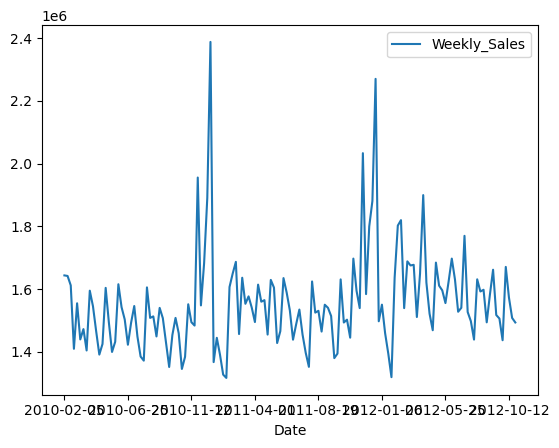

In [49]:
df_new.plot()

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
result = adfuller(new_data['Weekly_Sales'])
print(result)

(-19.832014418797428, 0.0, 14, 5902, {'1%': -3.4314584626230076, '5%': -2.862029837094782, '10%': -2.5670307380447914}, 172203.3575021919)


In [52]:
if (result[1]>0.05):
    print('not stationary')
else:
    print('stationary')

stationary


In [53]:
# p value is 0 and data show stationary mean no tread

In [54]:
df_new.shape

(143, 1)

In [55]:
rolling_mean=df_new.rolling(window=52).mean() # window 12 because 12 months ie yearly data addup  0:13 values/12 ,addup 1:13 values/12
rolling_mean_detrended=df_new - rolling_mean

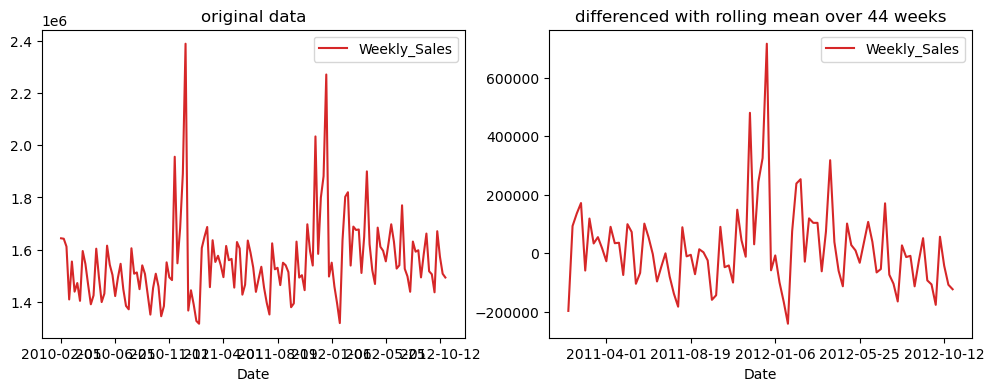

In [56]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',
                            title='differenced with rolling mean over 44 weeks',
                            ax=ax1)  #seasonal + trend

ax2=plt.subplot(1,2,1)
df_new.plot(figsize=(12,4),
          color='tab:red',
          title="original data",
          ax=ax2) # seasonal + trend (seasonal means same patterns follow)

plt.show()

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
rolling_mean_detrended.dropna()

,Weekly_Sales
Date,
2011-01-28,-197694.593269
2011-02-04,92748.394423
2011-02-11,135586.485000
2011-02-18,171374.438654
2011-02-25,-59573.305385
...,...
2012-09-28,-176909.317308
2012-10-05,56052.084615
2012-10-12,-43190.823077


In [59]:
decompose_result= seasonal_decompose(rolling_mean_detrended.dropna(),period=12)

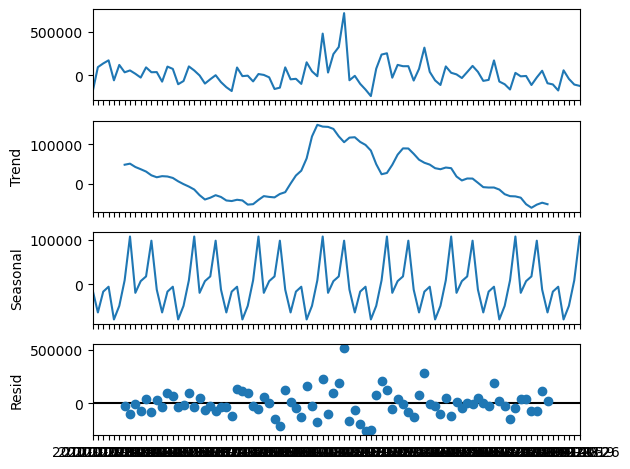

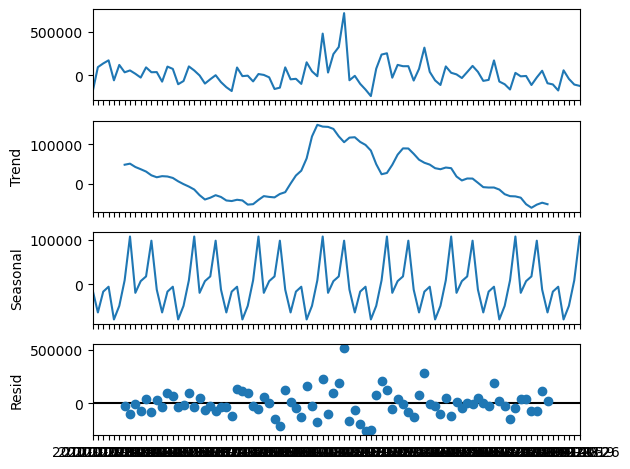

In [60]:
decompose_result.plot()

In [61]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

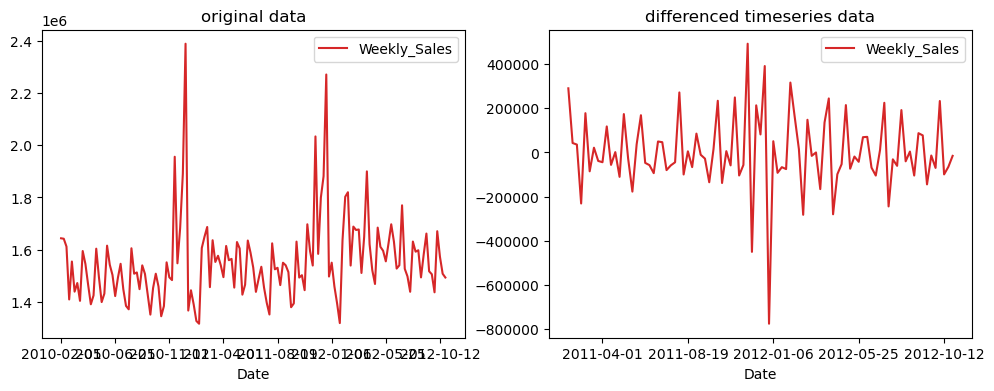

In [62]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red',
                            title='differenced timeseries data',
                            ax=ax1)

ax2=plt.subplot(1,2,1)
df_new.plot(figsize=(12,4),
          color='tab:red',
          title="original data",
          ax=ax2)

plt.show()

In [63]:
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()

In [64]:
rolling_mean_detrended_diff

,Weekly_Sales
Date,
2011-02-04,290442.987692
2011-02-11,42838.090577
2011-02-18,35787.953654
2011-02-25,-230947.744038
2011-03-04,177896.654423
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [65]:
result1 = adfuller(rolling_mean_detrended_diff['Weekly_Sales'])
print(result1)

(-5.869955831145217, 3.2578532935637927e-07, 7, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 2075.687144036794)


In [66]:
if (result1[1]>0.05):
    print('not stationary')
else:
    print('stationary')

stationary


In [67]:
# p value = 3.25

<Axes: title={'center': 'differenced timeseries data'}, xlabel='Date'>

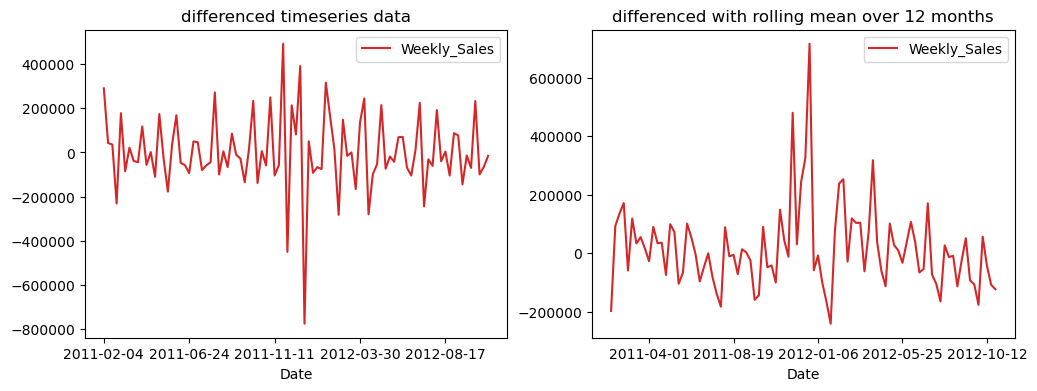

In [68]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',
                            title='differenced with rolling mean over 12 months',
                            ax=ax1) # no trend we have seasonality only

ax2=plt.subplot(1,2,1)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red',
                            title='differenced timeseries data',
                            ax=ax2) #stationary no trend little seasonality


In [69]:
rolling_mean_detrended_diff

,Weekly_Sales
Date,
2011-02-04,290442.987692
2011-02-11,42838.090577
2011-02-18,35787.953654
2011-02-25,-230947.744038
2011-03-04,177896.654423
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [70]:
m =rolling_mean_detrended_diff.rolling(window=52).mean()
s=rolling_mean_detrended_diff.rolling(window=52).std()

Text(0.5, 1.0, 'rolling_mean_detrended_diff with mean and std')

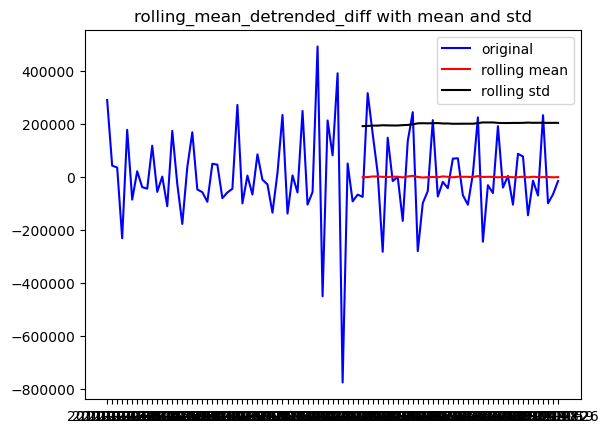

In [71]:
plt.plot(rolling_mean_detrended_diff,color='blue',label='original')
plt.plot(m,color='red',label='rolling mean')
plt.plot(s,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling_mean_detrended_diff with mean and std')

In [72]:
!pip install pmdarima

In [73]:
from pmdarima import auto_arima

In [74]:
order=auto_arima(rolling_mean_detrended_diff['Weekly_Sales'])

In [75]:
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1207.538
Date:                Mon, 29 Jul 2024   AIC                           2421.076
Time:                        15:19:37   BIC                           2428.608
Sample:                    02-04-2011   HQIC                          2424.115
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2370      0.116      2.050      0.040       0.010       0.464
ma.L1         -0.9361      0.054    -17.315      0.000      -1.042      -0.830
sigma2      2.002e+10   7.21e-13   2.78e+22      0.000       2e+10       2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                83.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             1.39
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.95e+38. Standard errors may be unstable.
"""

In [76]:
train=rolling_mean_detrended_diff.iloc[:75]['Weekly_Sales']
test=rolling_mean_detrended_diff.iloc[75:]['Weekly_Sales']

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [78]:
rolling_mean_detrended_diff

,Weekly_Sales
Date,
2011-02-04,290442.987692
2011-02-11,42838.090577
2011-02-18,35787.953654
2011-02-25,-230947.744038
2011-03-04,177896.654423
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [79]:
model=SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,52))
model=model.fit()

C:\Users\kg317\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kg317\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kg317\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [80]:
rolling_mean_detrended_diff['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

<Axes: xlabel='Date'>

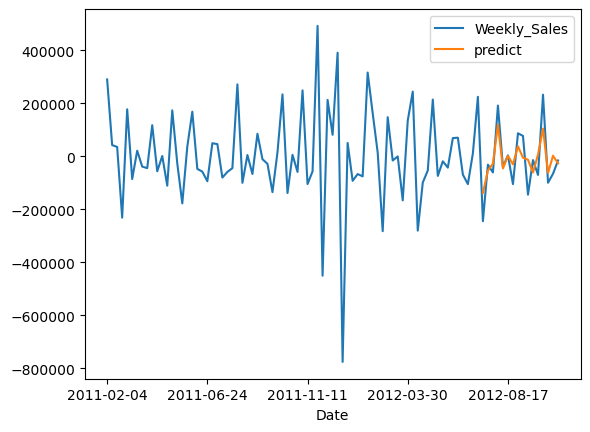

In [81]:
rolling_mean_detrended_diff[['Weekly_Sales','predict']].plot()

C:\Users\kg317\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

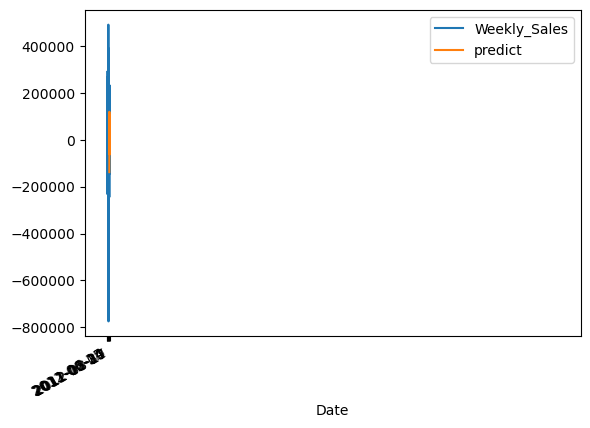

In [82]:
forecast=model.forecast(step=60)
rolling_mean_detrended_diff.plot()
forecast.plot()